# Parameter Processing

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime
import numpy as np

def parser(s):
    return datetime.strptime(s, '%Y-%m-%d')

series = pd.read_csv('Canada.csv', parse_dates=[0], index_col=0, squeeze=True, date_parser=parser)
series = series.asfreq(pd.infer_freq(series.index))
series.columns = series.columns.str.replace(' ', '_')
series = series.iloc[:, 1]
avg, dev = series.mean(), series.std()
series = (series - avg) / dev
series = series.diff().dropna()

## 1. Autocorrelation Graph

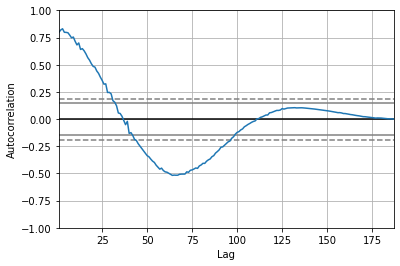

In [7]:
from pandas.plotting import autocorrelation_plot
autocorrelation_plot(series)
plt.show()

## 2. ACF Graph

<BarContainer object of 40 artists>

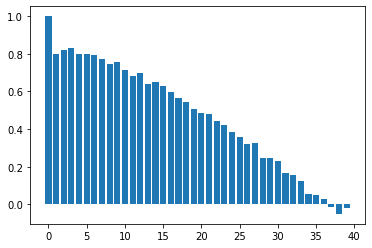

In [10]:
from statsmodels.tsa.stattools import acf, pacf
acf_vals = acf(series)
num_lags = 40
plt.bar(range(num_lags), acf_vals[:num_lags])

## 3. PACF Graph

<BarContainer object of 25 artists>

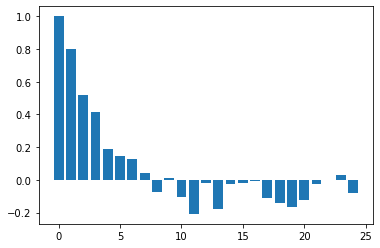

In [9]:
pacf_vals = pacf(series)
num_lags = 25
plt.bar(range(num_lags), pacf_vals[:num_lags])